# Homework 2 - Convolutional Neural Networks

### Deep Learning in Medicine - Spring 2025



**Note:** If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex

**See:** <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

**Submission instruction:** Upload and Submit a zipped folder named netid_hw2 consisting of your final jupyter notebook and necessary files in <a href='https://brightspace.nyu.edu/d2l/home/427921'>Brightspace</a>. If you use code or script from web, please give a link to the code in your answers. Not providing the reference of the code used will reduce your points!!

**Submission deadline: Saturday March 20rd, 2025**

### Topics & weightage -


1.   Convolutions (30)
2.   Network design (15)
3.   Literature review (19)
4.   Deep CNN design for disease classification (36)
5.   Analysis of Results (5)
6.   Bonus Questions (12) - optional!



## Question 1 Convolutions (Total 30 points)

### 1.1 Convolutions from **scratch** for image processing (11 points)

In [4]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [5]:
# functions to plot images
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')

#### 1.1.a (1 point)

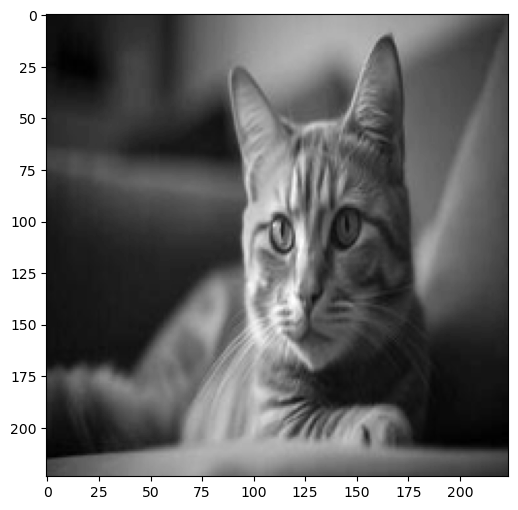

In [ ]:

image_path = "/Users/V/Desktop/cat.png"
image_path = "/scratch/rw3555/cat.png"

image = Image.open(image_path)  
image_resized = image.resize((224, 224))  
image_gray = ImageOps.grayscale(image_resized) 
image_array = np.array(image_gray)  

plot_image(image_array)

In [8]:
# defining filters 
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

#### 1.1.b (1.5 points)

In [ ]:
def calculate_target_size(img_size: int, kernel_size: int) -> tuple:
    '''
    Helper function to calculate the image size after applying the convolution.
    Basically calculates how many windows of the filter size you can fit to an image (assuming square image).
    Applying a convolution to an image will make it smaller (assuming no padding).
    The filter size determines how much smaller the image will be after convolving.

    Args:
      img_size: size of one dimension of the input image (assuming it's a square image)
      kernel_size: size of one dimension of the kernel (a square kernel)

    Returns:
      size: dimensions of the output image as a tuple (height, width)
    '''
    
    output_size = img_size - kernel_size + 1
    
    return (output_size, output_size)  



(222, 222)
(124, 124)
(30, 30)


#### 1.1.c (3 points)

In [ ]:
import numpy as np

def convolve(img: np.array, kernel: np.array) -> np.array:
    '''
    The convolve() function calculates the target size and creates 
    a matrix of zeros with that shape, iterates over all rows and 
    columns of the image matrix, subsets it, and applies the convolution.

    Args:
      img: the input image as a numpy array
      kernel: kernel as a numpy array

    Returns:
      convolved_img: output image after sliding the kernel over the input image  
    '''
    
    img_size = img.shape[0]  
    kernel_size = kernel.shape[0]  

    output_size = img_size - kernel_size + 1
    convolved_img = np.zeros((output_size, output_size))


    for i in range(output_size):
        for j in range(output_size):
           
            region = img[i:i+kernel_size, j:j+kernel_size]
      
            convolved_img[i, j] = np.sum(region * kernel)

    return convolved_img



卷积后的图像：
 [[-5. -5. -5.]
 [-5. -5. -5.]
 [-5. -5. -5.]]


#### 1.1.d (0.5 point)

img_sharpened:
 [[15. 15. 15. ... 64. 53. 56.]
 [14. 14. 14. ... 58. 43. 56.]
 [17. 17. 17. ... 50. 45. 52.]
 ...
 [66. 65. 73. ... 57. 50. 50.]
 [52. 58. 55. ... 48. 49. 49.]
 [75. 68. 73. ... 47. 41. 41.]]


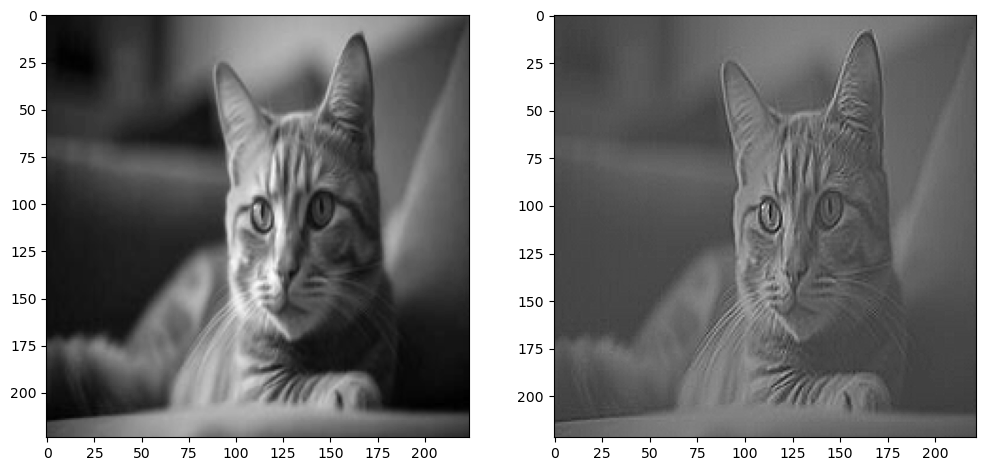

In [19]:
img_sharpened = convolve(image_array, sharpen)
print("img_sharpened:\n", img_sharpened)
plot_two_images(image_array, img_sharpened)


#### 1.1.e (0.5 point)

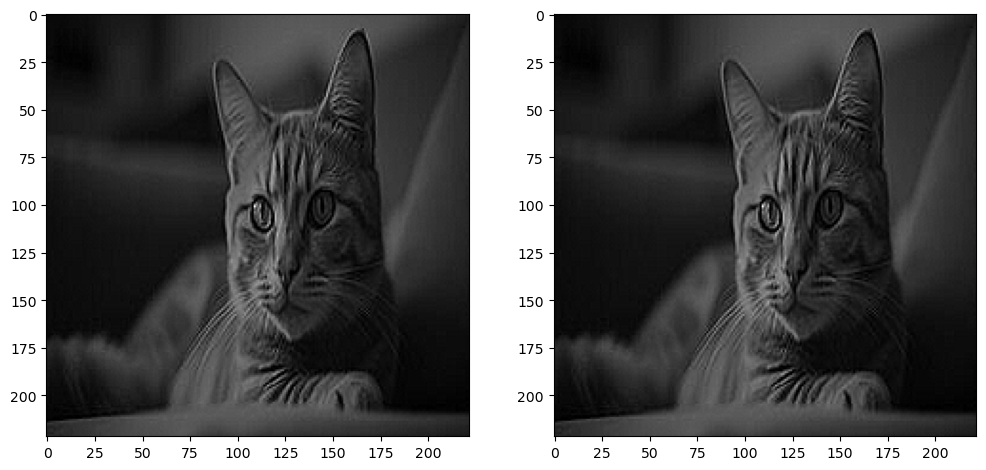

In [21]:
def negative_to_zero(img: np.array) -> np.array:
    '''
    Args:
      img: numpy array of image

    Returns:
      img: all values less than zero are assigned zero in original image
    '''
    img[img < 0] = 0  
    return img

img_sharpened_corrected = negative_to_zero(img_sharpened)
plot_two_images(img_sharpened, img_sharpened_corrected)


#### 1.1.f (1 point)

img_blurred:
 [[15.     15.     15.     ... 59.0625 56.875  57.0625]
 [15.25   15.25   15.25   ... 55.625  54.     54.9375]
 [15.75   15.75   15.75   ... 52.375  51.4375 53.1875]
 ...
 [61.25   63.5625 65.625  ... 52.25   51.125  49.875 ]
 [61.75   63.3125 64.8125 ... 49.     47.875  46.625 ]
 [62.6875 64.     65.5    ... 45.875  44.6875 43.4375]]


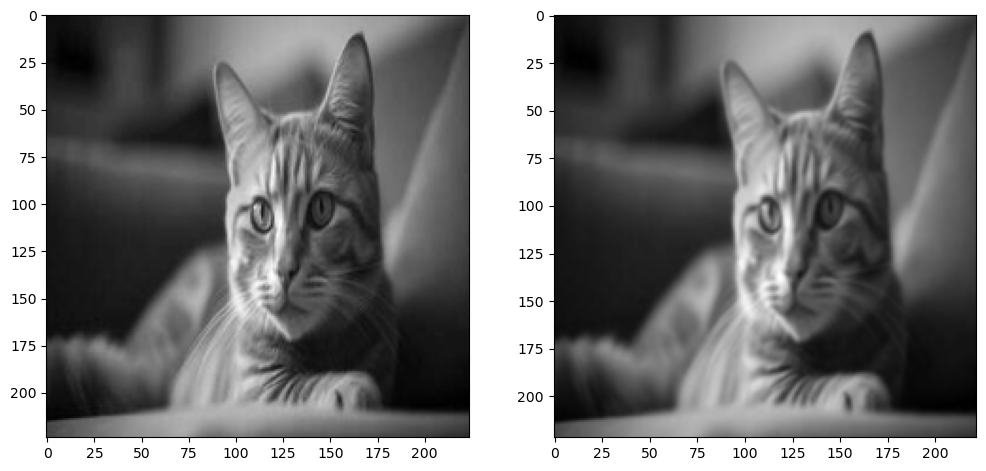

In [22]:
img_blurred = convolve(image_array, blur)
print("img_blurred:\n", img_blurred)
plot_two_images(image_array, img_blurred)


img_outlined:
 [[  0.   0.   0. ...  11. -11.   0.]
 [ -3.  -3.  -3. ...   4. -23.   0.]
 [  3.   3.   3. ...  -4. -18.  -2.]
 ...
 [  8.   6.  16. ...   8.  -1.   2.]
 [-20. -17. -21. ...   1.   1.   4.]
 [ 27.  13.  18. ...   1.  -8.  -5.]]


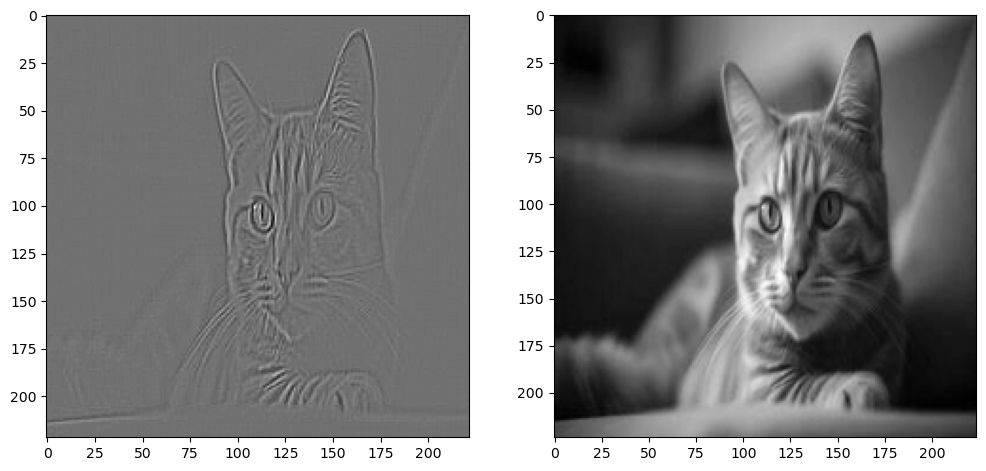

In [ ]:
img_outlined = convolve(image_array, outline)
print("img_outlined:\n", img_outlined)
plot_two_images(img_outlined, image_array)


**Reminder:** Padding is essentially a “black” border around the image. It’s black because the values are zeros, and zeros represent the color black. The black borders don’t have any side effects on the calculations, as it’s just a multiplication with zero.

#### 1.1.g (0.5 point)

In [24]:
def get_padding_width_per_side(kernel_size: int) -> int:
    '''
    Function that returns the number of pixels we need to 
    pad the image with on a single side, depending on the kernel size.

    Args:
      kernel_size: filter size 

    Returns:
      padding_width: the number of pixels to pad on one side
    '''
    padding_width = kernel_size // 2
    return padding_width


In [25]:
pad_3x3 = get_padding_width_per_side(3)
pad_5x5 = get_padding_width_per_side(5)
print("padding for kernel size 3 is", pad_3x3, "and padding for kernel size 5 is", pad_5x5)

padding for kernel size 3 is 1 and padding for kernel size 5 is 2


#### 1.1.h (1.5 points)

In [27]:
def add_padding_to_image(img: np.array, padding_width: int) -> np.array:
    '''
    Function that adds padding to the image. 
    First, the function declares a matrix of zeros with a shape of image.shape + padding * 2. 
    The function then indexes the matrix so the padding is ignored and changes the zeros with the actual image values.

    Args:
      img: Original image numpy array
      padding_width: obtained in the get_padding_width_per_side function earlier

    Returns:
      img_with_padding: padded image
    '''
    img_with_padding = np.zeros((img.shape[0] + 2 * padding_width, img.shape[1] + 2 * padding_width))
    img_with_padding[padding_width:-padding_width, padding_width:-padding_width] = img

    return img_with_padding


#### 1.1.i (1 point)

In the above function add_padding_to_image, explore the possible reason for the multiplication of padding_width by 2 in step 1

Because if we only added the padding_width, the image will be only  padded one side. The multiplication can make sure both side be padded. 

#### 1.1.j (0.5 point)

(226, 226)


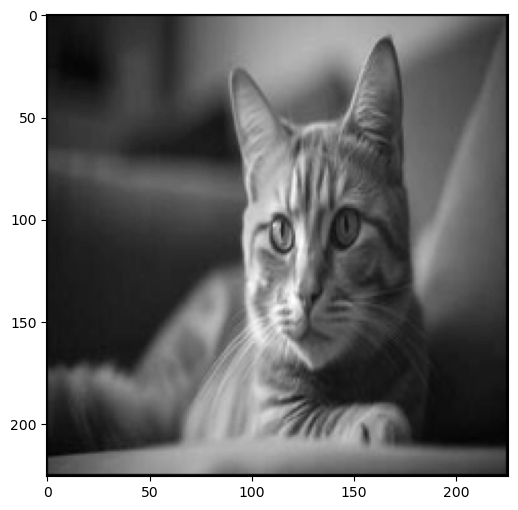

In [29]:
padding_width_3x3 = get_padding_width_per_side(3)  
img_with_padding_3x3 = add_padding_to_image(image_array, padding_width_3x3)
print(img_with_padding_3x3.shape)
plot_image(img_with_padding_3x3)


(228, 228)


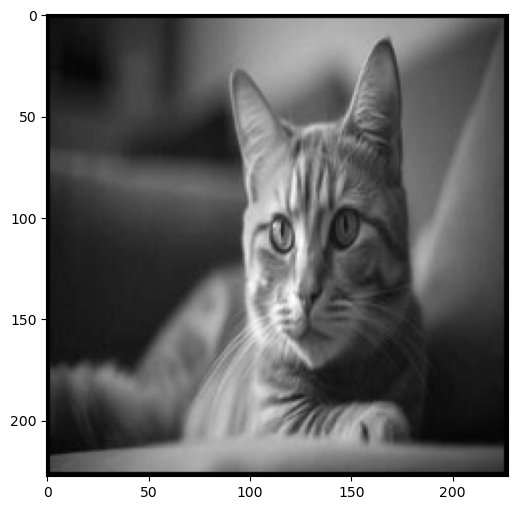

In [30]:
padding_width_5x5 = get_padding_width_per_side(5)  
img_with_padding_5x5 = add_padding_to_image(image_array, padding_width_5x5)
print(img_with_padding_5x5.shape)
plot_image(img_with_padding_5x5)


#### 1.1.k (1 point)

(226, 226)


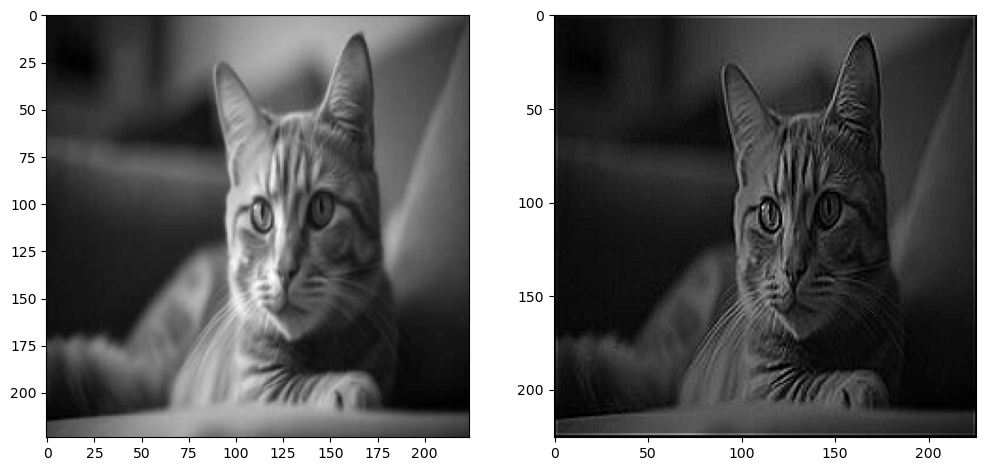

In [ ]:
img_sharpened_padded = convolve(img_with_padding_5x5, sharpen)
img_sharpened_padded_corrected = negative_to_zero(img_sharpened_padded)
print(img_sharpened_padded_corrected.shape)
plot_two_images(image_array, img_sharpened_padded_corrected)


### 1.2 Convolutional Layers (4 points)

We have a 3x5x5 image (3 channels) and three 3x3x3 convolution kernels as pictured. Bias term for each feature map is also provided. For the questions below, please provide the feature/activation maps requested, please provide the python code that you used to calculate the maps.

**Hint:** An image tensor should be [batch size, channels, height, weight], kernels/filters tensor should be [number of filters (output channels), filter_size_1 (input channels), filter_size_2, filter_size_3].

<img src="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2022/blob/main/Homework2/HW2_picture1.png?raw=1">

What will be the dimension of the feature maps after we forward propogate the image using the given convolution kernels for the following (a) - (d)

#### 1.2.a stride=1, padding = 0 (1 point)


(3, 3, 3)

#### 1.2.b stride=2, padding = 1 (1 point) 

(3, 3, 3)

#### 1.2.c stride=3, padding = 2 (1 point)

 (3, 3, 3)

#### 1.2.d stride=1, dilation rate=2, and padding=0 (1 point) 

(3, 1, 1)

### 1.3 Feature Dimensions of Convolutional Neural Network (4*0.5 points)

In this problem, we compute output feature shape of convolutional layers and pooling layers, which are building blocks of CNN. Let’s assume that input feature shape is C x W × H, where C is the number of channels, W is the width, and H is the height of input feature. 




#### 1.3.a (0.5 points)

A convolutional layer has 4 hyperparameters: the filter size(K), the padding size (P), the stride step size (S) and the number of filters (F). How many weights and biases are in this convolutional layer? And what is the shape of output feature that this convolutional layer produces?




$$
\text{Total Parameters} = F \times C \times K \times K + F
$$


$$
\text{Final output feature shape} = (F, \frac{W - K + 2P}{S} + 1, \frac{H - K + 2P}{S} + 1)
$$






#### 1.3.b (0.5 points)

A pooling layer has 2 hyperparameters: the stride step size(S) and the filter size (K). What is the output feature shape that this pooling layer produces?

$$
\text{Final output feature shape}= (C, \frac{W - K}{S} + 1, \frac{H - K}{S} + 1)
$$


#### 1.3.c (0.5 points)

Let’s assume that we have the CNN model which consists of L successive convolutional layers and the filter size is K and the stride step size is 1 for every convolutional layer. Then what is the receptive field size?

$$
R_1 = K
$$
$$
R_2 = R_1 + (K - 1)
$$

$$
R_2 = K + (K - 1)
$$

$$
R_3 = R_2 + (K - 1)
$$

$$
R_3 = K + (K - 1) + (K - 1)
$$
$$
R_L = K + (L - 1) \times (K - 1)
$$







#### 1.3.d (0.5 points)

Consider a downsampling layer (e.g. pooling layer and strided convolution layer). In this problem, we investigate pros and cons of downsampling layer. This layer reduces the output feature resolution and this implies that the output features loose the certain amount of spatial information. Therefore when we design CNN, we usually increase the channel length to compensate this loss. For example, if we apply the max pooling layer with kernel size of 2 and stride size of 2, we increase the output feature size by a factor of 2. If we apply this max pooling layer, how much the receptive field increases? Explain the advantage of decreasing the output feature resolution with the perspective of reducing the amount of computation.

1. The receptive field will double.   If after \( n \) pooling layers, the $$ R_{L+n} = 2^n \times R_L $$.



2. 
$$
\text{Computations} \propto C_{\text{in}} \times C_{\text{out}} \times W \times H \times K \times K
$$


$$
W_{\text{new}} = \frac{W}{2}, \quad H_{\text{new}} = \frac{H}{2}
$$

Thus, the new number of computations is:

$$
\text{New Computations} \propto C_{\text{in}} \times C_{\text{out}} \times \frac{W}{2} \times \frac{H}{2} \times K \times K
$$

$$
= \frac{1}{4} \times \text{Original Computations}
$$

It will reduce the 75% computation resource. The size of the feature maps also decreases to save storage.

### 1.4 (6 points)
Use the pytorch package to calculate feature/activation maps. Write a code which takes 3x5x5 image and performs a 2D convolution operation (with stride = 1 and zero padding) using 3x3x3 filters provided on the picture. After convolution layer use leaky ReLU activation function (with negative slope 0.01) and Max-Pooling operation with required parameters to finally obtain output of dimension 3x1x1. Provide the code, feature maps obtained from convolution operation, activation maps, and feature maps after Max-Pooling operation.

**Hint:** You can refer to [AdaptiveMaxPool2d](https://pytorch.org/docs/stable/nn.html#adaptivemaxpool2d) to get desired dimension output from Pooling layer.

In [33]:
# starter code to load image:x, kernel weights:w and bias:b
# if you hit errors related to the long data type convert the values in your numpy arrays to floats
import numpy as np
import torch.nn.functional as f
import torch
x = np.load('q1_input.npy')
w = np.load('q1_Filters.npy')
b = np.load('q1_biases.npy')

### 1.5 (7 points)
Use the pytorch package to calculate feature/activation maps of a residual unit. Example of a residual unit are seen in figure 2 of https://arxiv.org/pdf/1512.03385.pdf as well as in the figure below.


<img src="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2022/blob/main/Homework2/HW2_picture2.png?raw=1" width="150">

Write a code which takes 3x5x5 input image and performs two 2D convolution operations using the filters provided in the figure above. Please use the three 3x3x3 filters for the two Convolution layers. You need to set a suitable padding size for the convolution operations. After the convolution layers have the residual addition and use the ReLU activation function. Provide the code and feature maps obtained from each convolution operation, activation maps, and the last activation map obtained from the residual unit.

reference: https://github.com/KaimingHe/deep-residual-networks?tab=readme-ov-file (models part)

In [1]:
import torch
import torch.nn as nn

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size, padding=padding)
        self.activation = nn.ReLU()
    
    def forward(self, x):
        identity = x  
        out1 = self.conv1(x)
        act1 = self.activation(out1)
        out2 = self.conv2(act1)
        out_residual = out2 + identity
        out_final = self.activation(out_residual)

        return out1, act1, out2, out_residual, out_final
model = ResidualBlock(in_channels=3, out_channels=3)

input_image = torch.randn(1, 3, 5, 5) 
feature_map1, activation1, feature_map2, residual_map, final_output = model(input_image)


### 1.6 (2 points)
Describe the key design paramters of inception v3 (https://arxiv.org/pdf/1512.00567.pdf) and explain how it avoids overfitting of data.

1. The authors factorized the traditional 7 × 7 convolution into three 3 × 3 convolutions. For the Inception part of the network, they have 3 traditional inception modules at 35×35 with 288 filters each. This is reduced to a 17 × 17 grid with 768 filters . Then is reduced to a 8 × 8 × 1280 grid with the grid reduction. At the coarsest 8 × 8 levels, they have two Inception modules with a concatenated output filter bank size of 2048 for each tile.


2. inception v3 uses multiple smaller convolutions and also applies the Label Smoothing Regularization to regularize the classifier by estimating the effect of label dropout during training to improve the generalization ability.
 

## Question 2 Network design parameters for disease classification (Total 15 points)

Disease classification is a common problem in medicine. There are many ways to solve this problem. Goal of this question is to make sure that you have a clear picture in your mind about possible techniques that you can use in such a classification task.

Assume that we have a 10K images in a dataset of computed tomography (CTs). For each image, the dimension is 16x256x256 and we have the label for each image. The label of each image defines which class the image belongs (lets assume we have 4 different disease classes in total). You will describe your approach of classifying the disease for the techniques below. Make sure you do not forget the bias term. Please provide the pytorch code which designs the network for questions 2.1.a, 2.2.a, and 2.3.a.

**Hint:** See lab 4 for an example of how to make a class for a network (Implementing LeNet).


In [36]:
# starter code
# you can generate a random image tensor for batch_size 8
x = torch.Tensor(8,1,16,256,256).normal_().type(torch.FloatTensor)

#### 2.1.a (2 points)
Design a multi layer perceptron (MLP) with a two hidden layer which takes an image as input (by reshaping it to a vector: let's call this a vectorized image). Our network has to first map the vectorized images to a vector of 512, then to 256 in a hidden layer and then to 128 in a hidden layer and finally feeds this vector to a fully connected layer to get the probability of 5 tissue classes. 

reference : https://github.com/rcassani/mlp-example

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the (MLP) model
class MLPClassifier(nn.Module):
    def __init__(self, input_size=16*256*256, num_classes=4):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, num_classes)
                
    def forward(self, x):
        x = x.view(x.size(0), -1)  
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)  
        return x

model = MLPClassifier()
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)


#### 2.1.b (2 points)

Clearly mention the sizes for your input and output at each layer until you get final output vector with 5 tissue classes and an input of images of size 16x256x256.

1. input: input size: (16, 256, 256) output size: [1,048,576]
2. fc1	: input size: [1,048,576]	 output size: [512]
3. ReLU: input size: [512] output size: [512]
4. fc2: input size: [512] output size: [256]
5. ReLU: input size: [256] output size: [256]
6. fc3: input size: [256] output size: [128]
7. ReLU: input size: [128] output size: [128]
8. fc4: input size: [128] output size: [4]

#### 2.1.c (1 points)
How many parameters you need to fit for your design? How does adding another hidden layer (map to 64 after 128) will effect the number of parameters to use?

1. 536,871,424 + 131,328 + 32,896 + 516 = 537,036,164 
we need total 537,036,164  parameters 

2. For the new linear: 
f4: 128 × 64 = 8,192 8,192 + 64 = 8,256
f5: 64 × 4 = 256  256 + 4 = 260
537,044,164 - 537,036,164 = 8,000
Adding the new layer will result in an additional 8000 parameters. 


#### 2.2.a (2 points)
the images to a vector of 256 and then 128 (both with the help of convolution and pooling operations) then feeds this vector to a fully connected layer to get the probability of 5 disease classes.

reference : https://machinelearningmastery.com/understanding-the-design-of-a-convolutional-neural-network/

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Conv3d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool3d(kernel_size=2, stride=2)  
        
        self.conv2 = nn.Conv3d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool3d(kernel_size=2, stride=2)  

        self.conv3 = nn.Conv3d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.AdaptiveAvgPool3d((1, 4, 4))  

        self.fc1 = nn.Linear(32 * 1 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))   
        x = self.pool2(F.relu(self.conv2(x)))   
        x = self.pool3(F.relu(self.conv3(x)))   
        x = x.view(x.size(0), -1)               
        x = F.relu(self.fc1(x))                 
        x = self.fc2(x)                         
        return x

x = torch.randn(8, 1, 16, 256, 256)  
model = SimpleCNN()
output = model(x)
print(output.shape)  


torch.Size([8, 5])


### 2.2.b (2 points)
Clearly mention the sizes for your input, kernel, pooling, and output at each step until you get final output vector with 5 probabilities.

1.  Conv3D:  input:(8, 1, 16, 256, 256)	  kernel: 3×3×3       output: (8, 8, 16, 256, 256)
2. MaxPool3D： input:(8, 8, 16, 256, 256)   pooling: 2×2×2,      output: (8, 8, 8, 128, 128)
3. Conv3D： input:(8, 8, 8, 128, 128)   kernel: 3×3×3 ,      output: (8, 16, 8, 128, 128)
4. MaxPool3D： input:(8, 8, 16, 256, 256)   pooling: 2×2×2,      output: (8, 16, 4, 64, 64)
5. Conv3D： input:(8, 16, 4, 64, 64)   kernel=3×3×3,      output: (8, 32, 4, 64, 64)
6. AdaptiveAvgPool3D： input:(8, 16, 4, 64, 64)        output: (8, 32, 1, 4, 4)
7. Flatten： input:(8, 32, 1, 4, 4) output: (8, 512)
8. FC1： input:(8, 512)   kernel：(512→128)      output: (8, 128)
9. FC2： input:(8, 128)   kernel：(128→5)     output: (8, 5)




#### 2.2.c (1 point) 
How many parameters you need to fit for your design?

1. layer1 : 224 
2. layer2: 3472
3. layers: 13856
4. Total: 224+ 3472+ 13856= 17,552

### 2.2.d (2 points)
Now increase your selected convolution kernel size by 4 in each direction. Describe the effect of using small vs large filter size during convolution.

Before adding the layers, the total parameters in layer 1 were 224. Now, increase the kernel size by 4, and the total parameters are 2,752. 

The large layers will be computationally expensive and take more time to train the data. Meanwhile, the small layers can train the model faster and capture more details on local features. 

### 2.3 (3 points)
Explain your findings regading different types of neural networks and building blocks based on your observations from 2.1 and 2.2. 

The different neural networks are fit for different tasks.  Convolutional Neural Network is a fit for visual tasks. Multi-Layer Perceptrons are normally used for tabular data
The MLP has more parameters and most of the parameters are from the first layer. CNN has three convolutional layers and two fully connected layers, but with fewer parameters.
Large kernels may overfit and small kernels may allow deeper architectures.

## Question 3 Literature Review: ChestX-ray8 (Total 19 points)
Read this paper:

Pranav Rajpurkar, Jeremy Irvin, et al. 
CheXNet: Radiologist-Level Pneumonia Detection on Chest X-Rays with Deep Learning https://arxiv.org/abs/1711.05225


We are interested in understanding the goal of the task performed, the methods proposed, technical aspects of the implementation, and possible future work. After you read the full article answer the following questions. Describe your answers in your own words.  

### 3.1 (2 points) 

What was the underlying goal of this paper? What were the challenges in detection of pneumonia that this paper aimed at solving? What was the key motivation?


1. Goal: The authors develop an algorithm that can detect pneumonia from chest X-rays
2. challenges: The appearance of pneumonia in
X-ray images are often vague, can overlap with other diagnoses, and can mimic many other benign abnormalities. 
3. Key motivation: They make simple modifications to
CheXNet to detect all 14 diseases in ChestX-ray14,
and find that we outperform the best published results on all 14 diseases.

### 3.2  (3 points)
Describe the machine learning task (segmentation, classification, regression, etc?) that was attempted in this paper. Further describe the learning algorithm used (supervised, unsupervised, ..etc.) and the reason was using this algorithm.

This paper attempts to use machine learning to perform multi-label classification. It uses supervised learning, where the model is trained on a large set of input–output pairs: chest X-ray images as inputs and disease labels as outputs. Supervised learning allows the use of evaluation metrics to assess the model’s performance against radiologists.

### 3.3 (2.5 points)
How does the proposed architecture in this paper compare with the previous State of the art? Give details on the modifications and improvements, and reasons for why you think these worked.

They use CheXNet with a 121-layer Dense Convolutional Network (DenseNet) trained on the ChestX-ray 14 dataset, which was also used in previous research.

Improvements: 
Before inputting the images into the network, they
downscale the images to 224×224 and normalize based on
on the mean and standard deviation of images in the
ImageNet training set. 

They use sigmoid activations rather than softmax.

Reason: 
The transfer learning will improve the supervision performance. 

The sigmoid activation is suitable for multi-label classification.

### 3.4 (2 points)
Describe the CNN architecture used along with training details (a flow that explains the entire training process with details on the batch_size, optimizer, loss function, model weights, learning rate, etc). Also try to infer why were these paramters and hyperparamters chosen for this specific task.


They use the CheXNet with a 121-layer Dense Convolutional Network (DenseNet) trained on the ChestX-ray 14 dataset. and replace the final fully connected layer with one that
has a single output, after that they apply a sigmoid
nonlinearity.


batch_size: 16
Optimizer: The Adam optimizer was used to update weights.
Loss function: Binary Cross-Entropy (BCE) loss
model weights: initialized with ImageNet pretrained weights.
 Learning rate: 0.001


The Binary Cross-Entropy (BCE) loss is better for multi-label problems. 
Optimizer: Adaptive learning rate improves convergence for deep network.

### 3.5 (2.5 points)

How was the model evaluated? What were the metrics utilized? List down reasons of using these metrics over all others.





They are using the test set from the ChestX-ray14 dataset to evaluate on the task of pneumonia detection. And compare the CheXNet’s performance with the diagnoses of four practicing radiologists
They use F1, AUROC as the metric.

The AUROC allows direct comparison between the model and radiologists for pneumonia (a binary task: pneumonia vs no pneumonia).

### 3.6 (2.5 points)

Explain model interpretation through class activation mapping. Discuss the role of Class Activation Maps (CAMs) in CheXNet.?


CAMs are used to visualize the areas of the image most indicative of the disease.

CAMs provided visual explanations of the model's predictions and were also useful for identifying failure cases.

### 3.7 (2 points)
What was the kind of preprocessing the dataset went through? Explain reasons for each data transformation/preprocessing step.


They inputting the images into the network and downsizing the images to 224×224. Then they  normalize based 
on the mean and standard deviation of images in the
ImageNet training set. They also augment the training
data with random horizontal flipping.

The normalization is used to ensure faster convergence during fine-tuning. Resize the image to 224×224 to ensure compatibility with the architecture.

### 3.8 (2.5 points)

In the paper CAMs (class activation mappings) are used for visualisation. Can this method be used for any CNN? Describe the architectural requirements for getting CAM visualisations.

No, the CAMs need the specific CNN structure to work properly.

Requirements: 
The CNN must end with a Global Average Pooling (GAP) layer applied to the final convolutional feature and no additional fully connected layers before output.

## Question 4 Deep CNN design for disease classification (Total 36 points)

In this part of the howework, we will focus on classifiying the lung disease using chest x-ray dataset provided by NIH (https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community). You should be familiar with the dataset after answering question 3.

You need to use HPC for training part of this question, as your computer's CPU will not be fast enough to compute learning iterations. Please read the HPC instruction first. In case you use HPC, please have your code/scripts uploaded under the questions and provide the required plots and tables there as well. If you run the HW2 jupter script with Squash File System and Singularity on GCP, you can find the data under /images folder. We are interested in classifying pneumothorax, cardiomegaly and infiltration cases. By saying so we have 3 classes that we want to identify by modelling a deep CNN.

First, you need to work on Data_Entry_2017_v2020.csv file to identify cases/images that has infiltration, pneumothorax, and cardiomegaly. This file can be downloaded from https://nihcc.app.box.com/v/ChestXray-NIHCC

### 4.1 Train, Test, and Validation Sets (0.5 point)
Write a script to read data from Data_Entry_2017.csv and process to obtain 3 sets (train, validation and test). By using 'Finding Labels' column, define a class that each image belongs to, in total you can define 3 classes:
- 0 cardiomegaly
- 1 pneumothorax
- 2 infiltration

Generate a train, validation and test set by splitting the whole dataset containing specific classes (0, 1, and 2)  by 70%, 10% and 20%, respectively. Test set will not be used during modelling but it will be used to test your model's accuracy. Make sure you have similar percentages of different cases in each subset. Provide statistics of the number of classess in your subsets (you do not need to think about splitting the sets based on subjects for this homework; in general, we do not want images from the same subject to appear in both train and test sets). 

Write a .csv files defining the samples in your train, validation and test set with names: train.csv, validation.csv, and test.csv. Submit these files with your homework. 

In [3]:

import urllib.request
import os

image_dir = os.path.expanduser("/scratch/rw3555/HW2_images")  
os.makedirs(image_dir, exist_ok=True)

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
    'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
    'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
    'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
    'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
    'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
    'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
    'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    filename = f'images_{idx+1:02d}.tar.gz'
    filepath = os.path.join(image_dir, filename)
    print(f'Downloading {filename}...')
    urllib.request.urlretrieve(link, filepath)

print("Download complete. Files saved in:", image_dir)


Download complete. Files saved in: /scratch/rw3555/HW2_images


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/scratch/rw3555/Data_Entry_2017.csv")

def label_class(x):
    if "Cardiomegaly" in x:
        return 0
    elif "Pneumothorax" in x:
        return 1
    elif "Infiltration" in x:
        return 2
    else:
        return -1
df['class'] = df['Finding Labels'].apply(label_class)
df = df[df['class'] != -1]
train_val_df, test_df = train_test_split(df, test_size=0.2, stratify=df['class'], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.125, stratify=train_val_df['class'], random_state=42)
def print_distribution(name, data):
    print(f"{name} set distribution:")
    print(data['class'].value_counts(normalize=True))
    print(data['class'].value_counts())
    print()
print_distribution("Train", train_df)
print_distribution("Validation", val_df)
print_distribution("Test", test_df)
train_df.to_csv("train.csv", index=False)
val_df.to_csv("validation.csv", index=False)
test_df.to_csv("test.csv", index=False)


Train set distribution:
class
2    0.695937
1    0.198940
0    0.105124
Name: proportion, dtype: float64
class
2    12863
1     3677
0     1943
Name: count, dtype: int64

Validation set distribution:
class
2    0.695949
1    0.198788
0    0.105263
Name: proportion, dtype: float64
class
2    1838
1     525
0     278
Name: count, dtype: int64

Test set distribution:
class
2    0.695949
1    0.198978
0    0.105074
Name: proportion, dtype: float64
class
2    3676
1    1051
0     555
Name: count, dtype: int64



### 4.2 Data preparation before training (2 points)
From here on, you will use HW2_trainSet.csv, HW2_testSet.csv and HW2_validationSet.csv provided under github repo for defining train, test and validation set samples instead of the csv files you generate on question 4.1.


There are multiple ways of using images as an input during training or validation. Here, you will use torch Dataset class  (http://pytorch.org/tutorials/beginner/data_loading_tutorial.html). We provided an incomplete dataloader code below. Please add your code and complete it.

In [ ]:
# switch the order run this code below (chunk 8)
import tarfile
import os

image_dir = "/scratch/rw3555/HW2_images"
for filename in os.listdir(image_dir):
    if filename.endswith(".tar.gz"):
        filepath = os.path.join(image_dir, filename)
        print(f"Extracting {filepath}...")
        with tarfile.open(filepath, "r:gz") as tar:
            tar.extractall(path=image_dir)

In [14]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from skimage import io
import torch
from skimage import color
from pathlib import Path

class ChestXrayDataset(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

        self.classes = sorted(self.data_frame.iloc[:, 1].unique())
        self.class_to_idx = {label: idx for idx, label in enumerate(self.classes)}
        print("Category Mapping:", self.class_to_idx)

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        idx = int(idx)
        img_filename = self.data_frame.iloc[idx, 0]
        img_path = os.path.join(self.root_dir, "images", img_filename)

        if not os.path.exists(img_path):
            matches = list(Path(self.root_dir).rglob(img_filename))
            if matches:
                img_path = str(matches[0])
            else:
                raise FileNotFoundError(f"Image {img_filename} not found under {self.root_dir}")

        image = io.imread(img_path)
        if len(image.shape) == 2:
            image = color.gray2rgb(image)
        image = image.astype('float32') / 255.0

        label_name = self.data_frame.iloc[idx, 1]
        label = self.class_to_idx[label_name]
        label = torch.tensor(label, dtype=torch.long)

        sample = {'x': image, 'y': label}
        if self.transform:
            sample = self.transform(sample)

        return sample

# ------------------------------------------------------------
class ToTensorTransform:
    def __call__(self, sample):
        image, label = sample['x'], sample['y']
        image = torch.from_numpy(image).permute(2, 0, 1).float()  # HWC → CHW
        return {'x': image, 'y': label}

# ------------------------------------------------------------
train_csv = "/scratch/rw3555/HW2_trainSet.csv"
val_csv = "/scratch/rw3555/HW2_validationSet.csv"
test_csv = "/scratch/rw3555/HW2_testSet.csv"
image_dir = "/scratch/rw3555/HW2_images"  
transform = ToTensorTransform()

train_dataset = ChestXrayDataset(train_csv, image_dir, transform=transform)
val_dataset = ChestXrayDataset(val_csv, image_dir, transform=transform)
test_dataset = ChestXrayDataset(test_csv, image_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

if __name__ == "__main__":
    batch = next(iter(train_loader))
    images, labels = batch['x'], batch['y']
    print("Image batch shape:", images.shape)  
    print("Label batch shape:", labels.shape) 
    print("Labels:", labels)


Category Mapping: {'Cardiomegaly': 0, 'Pneumothorax': 1}
Category Mapping: {'Cardiomegaly': 0, 'Pneumothorax': 1}
Category Mapping: {'Cardiomegaly': 0, 'Pneumothorax': 1}
Image batch shape: torch.Size([32, 3, 1024, 1024])
Label batch shape: torch.Size([32])
Labels: tensor([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 0])


In [8]:
# ------------------------------------------------------------switch the order 
import tarfile
import os

image_dir = "/scratch/rw3555/HW2_images"
for filename in os.listdir(image_dir):
    if filename.endswith(".tar.gz"):
        filepath = os.path.join(image_dir, filename)
        print(f"Extracting {filepath}...")
        with tarfile.open(filepath, "r:gz") as tar:
            tar.extractall(path=image_dir)


Extracting /scratch/rw3555/HW2_images/images_04.tar.gz...
Extracting /scratch/rw3555/HW2_images/images_05.tar.gz...
Extracting /scratch/rw3555/HW2_images/images_10.tar.gz...
Extracting /scratch/rw3555/HW2_images/images_07.tar.gz...
Extracting /scratch/rw3555/HW2_images/images_02.tar.gz...
Extracting /scratch/rw3555/HW2_images/images_06.tar.gz...
Extracting /scratch/rw3555/HW2_images/images_08.tar.gz...
Extracting /scratch/rw3555/HW2_images/images_09.tar.gz...
Extracting /scratch/rw3555/HW2_images/images_11.tar.gz...
Extracting /scratch/rw3555/HW2_images/images_03.tar.gz...
Extracting /scratch/rw3555/HW2_images/images_01.tar.gz...
Extracting /scratch/rw3555/HW2_images/images_12.tar.gz...


### 4.3 CNN model definition (5 points)
Since now we can import images for model training, next step is to define a CNN model that you will use to train disease classification task. Any model requires us to select model parameters like how many layers, what is the kernel size, how many feature maps and so on. The number of possible models is infinite, but we need to make some design choices to start.  Lets design a CNN model with 4 convolutional layers, 4 residual units (similar question 1.5) and a fully connected (FC) layer followed by a classification layer. Lets use 

-  5x5 convolution kernels (stride 1 in residual units and stride 2 in convolutional layers)
-  ReLU for an activation function
-  Max pooling with kernel 2x2 and stride 2 only after the convolutional layers.

The number of feature maps are noted in the diagram for the convolutional layers and residual units.

<img src="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2025/blob/main/hws/hw2/medicalnet.png?raw=true" height="800">

Write a class which specifies this network details. 

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualUnit(nn.Module):
    def __init__(self, channels):
        super(ResidualUnit, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=5, stride=1, padding=2)

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.relu(out)
        out = self.conv2(out)
        out += identity  
        out = self.relu(out)
        return out

class ChestXrayCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(ChestXrayCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 8, kernel_size=5, stride=2, padding=2)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.res1 = ResidualUnit(8)

        self.conv2 = nn.Conv2d(8, 16, kernel_size=5, stride=2, padding=2)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.res2 = ResidualUnit(16)

        self.conv3 = nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.res3 = ResidualUnit(32)

        self.conv4 = nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=2)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.res4 = ResidualUnit(64)

        self.fc = nn.Linear(64 * 7 * 7, 128)  
        self.classifier = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.res1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.res2(x)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = self.res3(x)

        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool4(x)
        x = self.res4(x)

        x = x.view(x.size(0), -1)  
        x = self.fc(x)
        x = self.classifier(x)
        return x


### 4.4 (2 point)
How many learnable parameters of this model has? How many learnable parameters we would have if we replace the fully connected layer with global average pooling layer (Take a look at Section 3.2 of https://arxiv.org/pdf/1312.4400.pdf)?  

1. 
Convolutional layers1 (5×5×3)×8 + 8 = 608 
Convolutional layers2 (5×5×8)×16 + 16 = 16,016
Convolutional layers3 (5×5×16)×32 + 32 = 12,832
Convolutional layers4 (5×5×32)×64 + 64 = 51,264

Residual 1: 2 × [(5×5×8)×8 + 8] = 3,216
Residual 2: 2 × [(5×5×16)×16 + 16] = 12,832
Residual 3: 2 × [(5×5×32)×32 + 32] = 51,264
Residual 4  2 × [(5×5×64)×64 + 64] = 204,928

Fully Connected layer: 3136 × 128 + 128 = 401,536
Classification Layer: 128 × 3 + 3 = 387

Total: 758,883 
 
2.
The new global average pooling layer is 64 × 3 + 3 = 195
so the total is 758,883 - 401,536 + 195  = 357,542







### 4.5 Loss function and optimizer (2 points)
Define an appropriate loss criterion and an optimizer using pytorch. What type of loss function is applicable to our classification problem? Explain your choice of a loss function.  For an optimizer lets use Adam for now with default hyper-parmeters.

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
model = ChestXrayCNN(num_classes=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


1.What type of loss function is applicable to our classification problem?
  CrossEntropyLoss

2. Explain your choice of a loss function.
Because we have the multi-class classification task. CrossEntropyLoss will use softmax and calculate the negative log-likelihood of the correct class. A smaller loss value indicates a more accurate prediction.


**Some background:** In network architecture design, we want to have an architecture that has enough capacity to learn. We can achieve this by using large number of feature maps and/or many more connections and activation nodes. However, having a large number of learnable parameters can easily result in overfitting. To mitigate overfitting, we can keep the number of learnable parameters of the network small either using shallow networks or few feature maps. This approach results in underfitting that model can neither model the training data nor generalize to new data. Ideally, we want to select a model at the sweet spot between underfitting and overfitting. It is hard to find the exact sweet spot. 

We first need to make sure we have enough capacity to learn, without a capacity we will underfit. Here, you will need to check if designed model in 4.3 can learn or not. Since we do not need to check the generalization capacity (overfitting is OK for now since it shows learning is possible), it is a great strategy to use a subset of training samples. Also, using a subset of samples is helpful for debugging!!!

### 4.6 Train the network on a subset (5 points)
Lets use a script to take random samples from train set (HW2_trainSet.csv), lets name this set as HW2_randomTrainSet. Choose random samples from validation set (HW2_validationSet.csv), lets name this set as HW2_randomValidationSet. You used downsampling of images from 1024x1024 size to 64x64 in the Lab 4. This was fine for learning purpose but it will significantly reduce the infomation content of the images which is important especially in medicine. In this Homework, you MUST use original images of size 1024x1024 as the network input. 

In [18]:
# get samples from HW2_trainSet.csv
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('/scratch/rw3555/HW2_trainSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomTrainSet.csv',index=False)

df = pd.read_csv('/scratch/rw3555/HW2_validationSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomValidationSet.csv',index=False)

Selected subset class frequencies
 Class
1    158
0     72
Name: count, dtype: int64
Selected subset class frequencies
 Class
1    20
0    13
Name: count, dtype: int64


Use the random samples generated and write a script to train your network. Using the script train your network using your choice of weight initialization strategy. In case you need to define other hyperparameters choose them empirically, for example batch size. Plot average loss on your random sample set per epoch. (Stop the training after at most ~50 epochs).

Category Mapping: {'Cardiomegaly': 0, 'Pneumothorax': 1}
Epoch 1/50 - Loss: 1.7859
Epoch 2/50 - Loss: 0.6310
Epoch 3/50 - Loss: 0.5946
Epoch 4/50 - Loss: 0.5873
Epoch 5/50 - Loss: 0.5281
Epoch 6/50 - Loss: 0.4931
Epoch 7/50 - Loss: 0.4346
Epoch 8/50 - Loss: 0.4232
Epoch 9/50 - Loss: 0.2683
Epoch 10/50 - Loss: 0.2455
Epoch 11/50 - Loss: 0.1397
Epoch 12/50 - Loss: 0.0983
Epoch 13/50 - Loss: 0.1646
Epoch 14/50 - Loss: 0.0638
Epoch 15/50 - Loss: 0.2426
Epoch 16/50 - Loss: 0.0973
Epoch 17/50 - Loss: 0.0518
Epoch 18/50 - Loss: 0.1083
Epoch 19/50 - Loss: 0.0195
Epoch 20/50 - Loss: 0.0016
Epoch 21/50 - Loss: 0.0003
Epoch 22/50 - Loss: 0.0002
Epoch 23/50 - Loss: 0.0002
Epoch 24/50 - Loss: 0.0002
Epoch 25/50 - Loss: 0.0001
Epoch 26/50 - Loss: 0.0001
Epoch 27/50 - Loss: 0.0001
Epoch 28/50 - Loss: 0.0001
Epoch 29/50 - Loss: 0.0001
Epoch 30/50 - Loss: 0.0001
Epoch 31/50 - Loss: 0.0001
Epoch 32/50 - Loss: 0.0001
Epoch 33/50 - Loss: 0.0001
Epoch 34/50 - Loss: 0.0001
Epoch 35/50 - Loss: 0.0000
Epoch 3

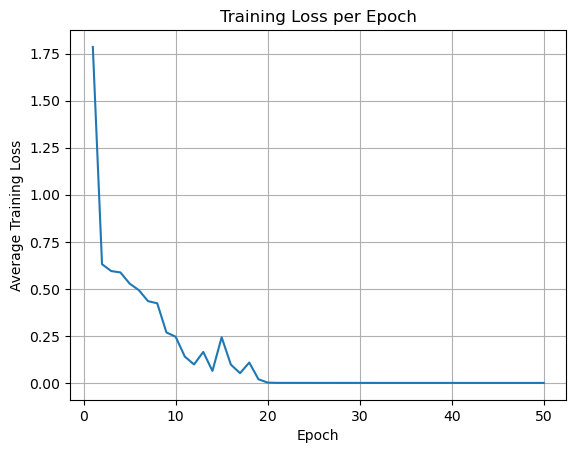

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os

# ---------------- Dataset ----------------
class ChestXrayDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

        self.classes = sorted(self.data.iloc[:, 1].unique())
        self.class_to_idx = {name: i for i, name in enumerate(self.classes)}
        print("Category Mapping:", self.class_to_idx)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, "images", self.data.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")

        label_str = self.data.iloc[idx, 1]
        label = self.class_to_idx[label_str]
        label = torch.tensor(label, dtype=torch.long)

        if self.transform:
            image = self.transform(image)
        return image, label

class ResidualUnit(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=5, padding=2)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=5, padding=2)

    def forward(self, x):
        identity = x
        out = self.relu(self.conv1(x))
        out = self.conv2(out)
        return self.relu(out + identity)

class ChestXrayCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 5, stride=2, padding=2)
        self.conv2 = nn.Conv2d(8, 16, 5, stride=2, padding=2)
        self.conv3 = nn.Conv2d(16, 32, 5, stride=2, padding=2)
        self.conv4 = nn.Conv2d(32, 64, 5, stride=2, padding=2)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.res1 = ResidualUnit(8)
        self.res2 = ResidualUnit(16)
        self.res3 = ResidualUnit(32)
        self.res4 = ResidualUnit(64)
        self.global_pool = nn.AdaptiveAvgPool2d((4, 4))  
        self.fc = nn.Linear(64 * 4 * 4, 128)
        self.out = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.res1(x)
        x = self.pool(self.relu(self.conv2(x)))
        x = self.res2(x)
        x = self.pool(self.relu(self.conv3(x)))
        x = self.res3(x)
        x = self.pool(self.relu(self.conv4(x)))
        x = self.res4(x)
        x = self.global_pool(x)  
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return self.out(x)

def init_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

def train():
    csv_path = "/scratch/rw3555/HW2_randomTrainSet.csv"
    image_dir = "/scratch/rw3555/HW2_images"
    batch_size = 8
    epochs = 50
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    dataset = ChestXrayDataset(csv_path, image_dir, transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    num_classes = len(dataset.class_to_idx)
    model = ChestXrayCNN(num_classes=num_classes).to(device)
    model.apply(init_weights)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    avg_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        avg_loss = running_loss / len(dataset)
        avg_losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

    # Plot loss curve
    plt.plot(range(1, epochs+1), avg_losses)
    plt.xlabel("Epoch")
    plt.ylabel("Average Training Loss")
    plt.title("Training Loss per Epoch")
    plt.grid(True)
    plt.savefig("loss_curve.png")
    plt.show()

if __name__ == "__main__":
    train()


### 4.7 Analysis of training using a CNN model (2 points)
Describe your findings. Can your network learn from small subset of random samples? Does CNN model have enough capacity to learn with your choice of emprical hyperparameters?
-  If yes, how will average loss plot will change if you multiply the learning rate by 15?
-  If no, how can you increase the model capacity? Increase your model capacity and train again until you find a model with enough capacity. If the capacity increase is not sufficient to learn, think about empirical parameters you choose in designing your network and make some changes on your selection. Describe what type of changes you made to your original network and how can you manage this model to learn.

In [ ]:
# The loss decreases sharply in the first 10 epochs and drops to 0 at the end, which indicates that the model can fit well with this small dataset and the CNN model has enough capacity to learn with your choice of empirical hyperparameters.The initial learning rate is 0.001, and after multiplying by 15, it is 0.015. The loss curve may become unstable and not converge at the end. I will increase the extra convolutional layers. I will choose the normalization and proper activation functions to achieve the optimization.


### 4.8 Hyperparameters (2.5 points)
Now, we will revisit our selection of CNN model architecture, training parameters and so on: i.e. hyperparameters. In your investigations, define how you will change the hyperparameter in the light of model performance using previous hyperparameters. Provide your rationale choosing the next hyperparameter. Provide learning loss and accuracy curves, and model performance in HW2_randomValidationSet. You will use macro AUC as the performance metric for comparing CNN models for disease classification task.  Report macro AUC for each CNN model with different hyperparameters (Check http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings).

Investigate the effect of learning rate and batch size in the model performance (try atleast 5 learning rates and 3 batch sizes) and select optimal values for both. You only need to put your best result here.

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

class ChestXrayDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.classes = sorted(self.data.iloc[:, 1].unique())
        self.class_to_idx = {name: i for i, name in enumerate(self.classes)}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, "images", self.data.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = self.class_to_idx[self.data.iloc[idx, 1]]
        label = torch.tensor(label, dtype=torch.long)
        if self.transform:
            image = self.transform(image)
        return image, label

# -------- Residual Unit --------
class ResidualUnit(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=5, padding=2)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=5, padding=2)

    def forward(self, x):
        identity = x
        out = self.relu(self.conv1(x))
        out = self.conv2(out)
        return self.relu(out + identity)

# -------- CNN Model --------
class ChestXrayCNN(nn.Module):
    def __init__(self, num_classes=3):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 5, stride=2, padding=2)
        self.conv2 = nn.Conv2d(8, 16, 5, stride=2, padding=2)
        self.conv3 = nn.Conv2d(16, 32, 5, stride=2, padding=2)
        self.conv4 = nn.Conv2d(32, 64, 5, stride=2, padding=2)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.res1 = ResidualUnit(8)
        self.res2 = ResidualUnit(16)
        self.res3 = ResidualUnit(32)
        self.res4 = ResidualUnit(64)
        self.global_pool = nn.AdaptiveAvgPool2d((4, 4))
        self.fc = nn.Linear(64 * 4 * 4, 128)
        self.out = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.res1(x)
        x = self.pool(self.relu(self.conv2(x)))
        x = self.res2(x)
        x = self.pool(self.relu(self.conv3(x)))
        x = self.res3(x)
        x = self.pool(self.relu(self.conv4(x)))
        x = self.res4(x)
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return self.out(x)

def train_evaluate(model_class, lr, batch_size, num_epochs=50):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_csv = "/scratch/rw3555/HW2_randomTrainSet.csv"
    val_csv = "/scratch/rw3555/HW2_randomValidationSet.csv"
    img_dir = "/scratch/rw3555/HW2_images"

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    train_ds = ChestXrayDataset(train_csv, img_dir, transform)
    val_ds = ChestXrayDataset(val_csv, img_dir, transform)
    num_classes = len(train_ds.class_to_idx)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

    model = model_class(num_classes=num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_loss, train_acc = [], []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * imgs.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
        epoch_loss = total_loss / len(train_loader.dataset)
        epoch_acc = correct / len(train_loader.dataset)
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)
        print(f"Epoch {epoch+1}/{num_epochs} | Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.4f}")

    model.eval()
    all_labels, all_probs = [], []
    with torch.no_grad():
        for imgs, labels in val_loader:
            outputs = model(imgs.to(device))
            probs = torch.softmax(outputs, dim=1).cpu().numpy()
            all_probs.append(probs)
            all_labels.append(labels.numpy())
    y_true = np.concatenate(all_labels)
    y_score = np.concatenate(all_probs)

    if y_score.shape[1] == 2:
        macro_auc = roc_auc_score(y_true, y_score[:, 1])
    else:
        macro_auc = roc_auc_score(y_true, y_score, multi_class="ovr", average='macro')

    plt.figure()
    plt.plot(range(1, num_epochs+1), train_loss, label="Loss")
    plt.plot(range(1, num_epochs+1), train_acc, label="Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title(f"LR={lr}, BS={batch_size}, AUC={macro_auc:.4f}")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"loss_acc_lr{lr}_bs{batch_size}.png")
    plt.close()

    return macro_auc, (lr, batch_size)


In [ ]:
if __name__ == "__main__":
    learning_rates = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
    batch_sizes = [8, 16, 32]

    best_auc = 0
    best_setting = None

    for lr in learning_rates:
        for bs in batch_sizes:
            print(f"\nTraining with LR={lr}, BS={bs}")
            auc, setting = train_evaluate(ChestXrayCNN, lr, bs)
            print(f"Macro AUC = {auc:.4f}")
            if auc > best_auc:
                best_auc = auc
                best_setting = setting

    print(f" Best Setting: LR={best_setting[0]}, BS={best_setting[1]} | Macro AUC: {best_auc:.4f}")



Training with LR=0.0001, BS=8
Epoch 1/50 | Loss: 0.6403 | Acc: 0.6870
Epoch 2/50 | Loss: 0.6251 | Acc: 0.6870
Epoch 3/50 | Loss: 0.6220 | Acc: 0.6870
Epoch 4/50 | Loss: 0.6186 | Acc: 0.6870
Epoch 5/50 | Loss: 0.6331 | Acc: 0.6870
Epoch 6/50 | Loss: 0.6182 | Acc: 0.6870
Epoch 7/50 | Loss: 0.6112 | Acc: 0.6870
Epoch 8/50 | Loss: 0.5953 | Acc: 0.6913
Epoch 9/50 | Loss: 0.5967 | Acc: 0.7217
Epoch 10/50 | Loss: 0.5739 | Acc: 0.6913
Epoch 11/50 | Loss: 0.5459 | Acc: 0.7217
Epoch 12/50 | Loss: 0.5894 | Acc: 0.7174
Epoch 13/50 | Loss: 0.5483 | Acc: 0.7261
Epoch 14/50 | Loss: 0.5272 | Acc: 0.7435
Epoch 15/50 | Loss: 0.4921 | Acc: 0.7783
Epoch 16/50 | Loss: 0.5151 | Acc: 0.7391
Epoch 17/50 | Loss: 0.4739 | Acc: 0.7522
Epoch 18/50 | Loss: 0.4913 | Acc: 0.7391
Epoch 19/50 | Loss: 0.3925 | Acc: 0.8348
Epoch 20/50 | Loss: 0.3967 | Acc: 0.8304
Epoch 21/50 | Loss: 0.3215 | Acc: 0.8696
Epoch 22/50 | Loss: 0.2768 | Acc: 0.8739
Epoch 23/50 | Loss: 0.1899 | Acc: 0.9217
Epoch 24/50 | Loss: 0.1229 | Acc: 0

### 4.9 Train the network on the whole dataset (4 points)
After question 4.7, you should have a network which has enough capacity to learn and you were able to debug your training code so that it is now ready to be trained on the whole dataset. Use the best batch size and learning rate from 4.8. Train your network on the whole train set (HW2_trainSet_new.csv) and check the validation loss on the whole validation set (HW2_validationSet_new.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

### 4.10 Experiments with Resnet18

Let's use Resnet18 on our dataset and see how it performs. We can import the standard architectures directly using PyTorch's torchvison.models module. Refer to https://pytorch.org/docs/stable/torchvision/models.html to see all available models in PyTorch. You'll later, in this course, learn about a convenient and useful concept known as Transfer Learning. For now, we will  use the Resnet18 and train the architecture from scratch without any pre-training. Here is the link for the ResNet paper: https://arxiv.org/pdf/1512.03385.pdf .

#### 4.10.a (2 Point)

What is the reason of using 1x1 convolutions before 3x3 convolutions in the resnet architecture?

In [ ]:
# Using the 1×1 convolutions to reduce the number of features and allow learning interactions between channels.


# Using the 1×1 convolutions to reduce the number of features and allow learning interactions between channels.


#### 4.10.b Train the ResNet18 on the whole dataset

We provide a new dataset class and a few additional transformations to the data for this new architecture. We have a new dataset class as ResNet18 architectures expect 3 channels in their primary input and other reasons which you'll later come to know - after the lecture on transfer learning. Nevertheless, for our case, we use them to reduce the required GPU usage as the Resnet18 architecture is significantly complex and GPU memory-intensive architecture than the CNN implemented above.

In [ ]:
from torchvision import transforms
from sklearn.preprocessing import LabelEncoder

# torchvision models are trained on input images normalized to [0 1] range .ToPILImage() function achives this
# additional normalization is required see: http://pytorch.org/docs/master/torchvision/models.html

train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomResizedCrop(896),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

validation_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.CenterCrop(896),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

class ChestXrayDataset_ResNet(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = load_data_and_get_class(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.data_frame.iloc[idx, 0])
        
        image = io.imread(img_name)
        if len(image.shape) > 2 and image.shape[2] == 4:
            image = image[:,:,0]
            
        image=np.repeat(image[None,...],3,axis=0)
            
        image_class = self.data_frame.iloc[idx, -1]

        if self.transform:
            image = self.transform(image)
            
        sample = {'x': image, 'y': image_class}

        return sample

def load_data_and_get_class(path_to_data):
    data = pd.read_csv(path_to_data)
    encoder = LabelEncoder()
    data['Class'] = encoder.fit_transform(data['Finding Labels'])
    return data

#### 4.10.c Architecture modification (4.5 points) 
In this question you need to develop a CNN model based on Resnet18 architecture. Please import the original ResNet18 model from PyTorch models (You can also implement this model by your own using the resnet paper). Modify the architecture so that the model will work with full size 1024x1024 image inputs and 3 classes of our interest:
- 0 cardiomegaly
- 1 pneumothorax
- 2 infiltration

Make sure the model you developed uses random weights!

In [ ]:
# reference  https://www.kaggle.com/code/greatcodes/pytorch-cnn-resnet18-cifar10

Label Mapping: {'cardiomegaly': 0, 'pneumothorax': 1, 'infiltration': 2}


/home/rw3555/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rw3555/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/20 - Loss: 0.7109
Epoch 2/20 - Loss: 0.6510
Epoch 3/20 - Loss: 0.6218
Epoch 4/20 - Loss: 0.6242
Epoch 5/20 - Loss: 0.6119
Epoch 6/20 - Loss: 0.5846
Epoch 7/20 - Loss: 0.5569
Epoch 8/20 - Loss: 0.5738
Epoch 9/20 - Loss: 0.5483
Epoch 10/20 - Loss: 0.5866
Epoch 11/20 - Loss: 0.5343
Epoch 12/20 - Loss: 0.5117
Epoch 13/20 - Loss: 0.5566
Epoch 14/20 - Loss: 0.5084
Epoch 15/20 - Loss: 0.4868
Epoch 16/20 - Loss: 0.4892
Epoch 17/20 - Loss: 0.5089
Epoch 18/20 - Loss: 0.4461
Epoch 19/20 - Loss: 0.4259
Epoch 20/20 - Loss: 0.3625


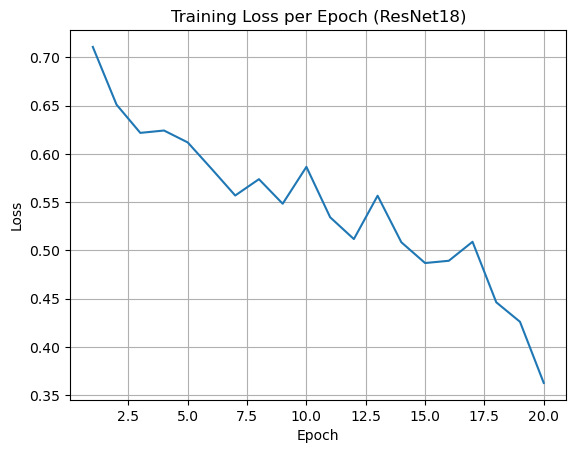

✅ Training completed and model saved.


In [5]:
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

class ChestXrayDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

        self.classes = ['cardiomegaly', 'pneumothorax', 'infiltration']
        self.class_to_idx = {name: i for i, name in enumerate(self.classes)}
        print("Label Mapping:", self.class_to_idx)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, "images", self.data.iloc[idx, 0])
        image = Image.open(img_name).convert("RGB")
        label_name = self.data.iloc[idx, 1]
        label = self.class_to_idx[label_name.lower()]  # convert to lowercase just in case
        label = torch.tensor(label, dtype=torch.long)
        if self.transform:
            image = self.transform(image)
        return image, label

class CustomResNet18(nn.Module):
    def __init__(self, num_classes=3):
        super(CustomResNet18, self).__init__()
        self.model = models.resnet18(pretrained=False)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

def train_model():
    csv_path = "/scratch/rw3555/HW2_randomTrainSet.csv"
    image_dir = "/scratch/rw3555/HW2_images"
    batch_size = 4
    num_epochs = 20
    lr = 1e-4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    transform = transforms.Compose([
        transforms.Resize((1024, 1024)),  # Resize to 1024x1024
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    dataset = ChestXrayDataset(csv_file=csv_path, img_dir=image_dir, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    num_classes = 3
    model = CustomResNet18(num_classes=num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(dataset)
        train_losses.append(epoch_loss)
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}")

    plt.plot(range(1, num_epochs+1), train_losses, label="Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss per Epoch (ResNet18)")
    plt.grid(True)
    plt.savefig("resnet18_loss_curve.png")
    plt.show()

    torch.save(model.state_dict(), "resnet18_random_init.pth")
    print("✅ Training completed and model saved.")

if __name__ == "__main__":
    train_model()


#### 4.10.d Train the network on the whole dataset (4.5 points)
Similar to question 4.7 train the model you developed in question 4.10.b on the whole train set (HW2_trainSet_new.csv) and check the validation loss on the whole validation set (HW2_validationSet_new.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from sklearn.metrics import accuracy_score
from PIL import Image
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# ---------------- Dataset ----------------
class ChestXrayDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.classes = ['cardiomegaly', 'pneumothorax', 'infiltration']
        self.class_to_idx = {name: i for i, name in enumerate(self.classes)}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, "images", self.data.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = self.class_to_idx[self.data.iloc[idx, 1].lower()]
        label = torch.tensor(label, dtype=torch.long)
        if self.transform:
            image = self.transform(image)
        return image, label

# ---------------- ResNet18 ----------------
class CustomResNet18(nn.Module):
    def __init__(self, num_classes=3):
        super().__init__()
        self.model = models.resnet18(weights=None)  # new API
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

def train_model():
    train_csv = "/scratch/rw3555/HW2_trainSet_new.csv"
    val_csv = "/scratch/rw3555/HW2_validationSet_new.csv"
    img_dir = "/scratch/rw3555/HW2_images"
    batch_size = 8
    num_epochs = 20
    lr = 1e-4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    transform = transforms.Compose([
        transforms.Resize((896, 896)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    train_ds = ChestXrayDataset(train_csv, img_dir, transform)
    val_ds = ChestXrayDataset(val_csv, img_dir, transform)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

    model = CustomResNet18(num_classes=3).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, train_accs = [], []
    val_losses, val_accs = [], []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * images.size(0)
            correct += (outputs.argmax(dim=1) == labels).sum().item()
            total += images.size(0)

        train_loss = total_loss / total
        train_acc = correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Validation
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
                val_correct += (outputs.argmax(dim=1) == labels).sum().item()
                val_total += images.size(0)

        val_losses.append(val_loss / val_total)
        val_accs.append(val_correct / val_total)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Val Loss: {val_losses[-1]:.4f} Acc: {val_accs[-1]:.4f}")

    epochs = range(1, num_epochs+1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss per Epoch")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label="Train Acc")
    plt.plot(epochs, val_accs, label="Val Acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy per Epoch")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig("resnet18_full_training_loss_acc.png")
    plt.show()

    torch.save(model.state_dict(), "resnet18_full_trained.pth")

if __name__ == "__main__":
    train_model()


## Question 5 Analysis of the results from two networks trained on the full dataset (Total 5 points)
Use the validation loss to choose models from question 4.9 (model1) and question 4.10 (model2) (these models are trained on the full dataset and they learned from train data and generalized well to the validation set). 

### 5.1 Model selection by performance on test set (5 Points)
Using these models, plot confusion matrix and ROC curve for the disease classifier on the test set (HW2_TestSet_new.csv). Report AUC for this CNN model as the performance metric. You will have two confusion matrices and two ROC curves to compare model1 and model2.

In [ ]:
# this is the place we predict the disease from a model trained, output for this function is 
# the target values and probabilty of each image having a disease 

# example of how to plot ROC curves
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

# example of how to calculate confusion matrix
# https://www.kaggle.com/grfiv4/plot-a-confusion-matrix



##  6 Bonus Questions (Maximum 12 points)

**Note:** this section is optional.

### 6.1 Understanding the network (Bonus Question maximum 5 points)

Even if you do both 6.1.a and 6.1.b, the max points for this question is 5.

#### 6.1.a Occlusion (5 points)
Using the best performing model (choose the model using the analysis you performed on question 5.1), we will figure out where our network gathers infomation to decide the class for the image. One way of doing this is to occlude parts of the image and run through your network. By changing the location of the ocluded region we can visualize the probability of image being in one class as a 2-dimensional heat map. Using the best performing model, provide the heat map of the following images: HW2_visualize.csv. Do the heap map and bounding box for pathologies provide similar information? Describe your findings.
Reference: https://arxiv.org/pdf/1311.2901.pdf

In [ ]:
# you can use the code from: https://github.com/thesemicolonguy/convisualize_nb/blob/master/cnn-visualize.ipynb 


#### 6.1.b GradCAM (5 points)
An alternative approach to model interpretation is gradcam. Go through https://arxiv.org/pdf/1610.02391.pdf and create heatmaps of images in HW2_visualize.csv using this method. Repeat the analysis in 6.1.a and also compare the time-taken to generate occlusions and gradcams

### 6.2 Tiling and CNNs (Bonus Question 7 points)

When using CNNs it may be helpful to first tile the image, especially for segmentation and object detection tasks. Focus on the "Invasive Ductal Carcinoma Segmentation Use Case" section of this [paper](https://www.sciencedirect.com/science/article/pii/S2153353922005478?via%3Dihub#tbl1). The data is avaliable [here](https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images/data).

#### 6.2.a (0.5 points)

Why is it helpful to tile an image and use the tiles as input for a CNN for segmentation?

#### 6.2.b (0.5 points)

Describe the hyperparameters that are introduced when you tile an image.

#### 6.2.c (0.5 points)

What are some metrics that can be used to evaluate segmenation of the full image (when tiles are recombined)?

#### 6.2.d (4 points)

Load the data, train a CNN, and evaluate the performance on the dataset.

**Note:** due to the size of this dataset, feel free to sample only part of the dataset to use to train and evaluate your model. Just please make sure all classes are represented, and that you do not train and test on the same patients.

#### 6.2.e (1.5 points)

Select a patch of 7x7 images and predict their classification. Then display them all together as one image, and denote the patches that are predicted as IDC. Diplay another image that denotes that patches that are IDC.